In [33]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam , RMSprop


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [15]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

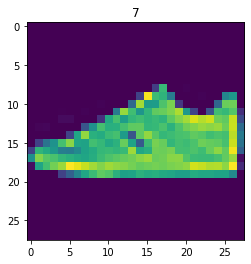

In [13]:
plt.imshow(x_train[189])
plt.title(y_train[189])
plt.show() 

In [17]:
len(set(y_train) )

10

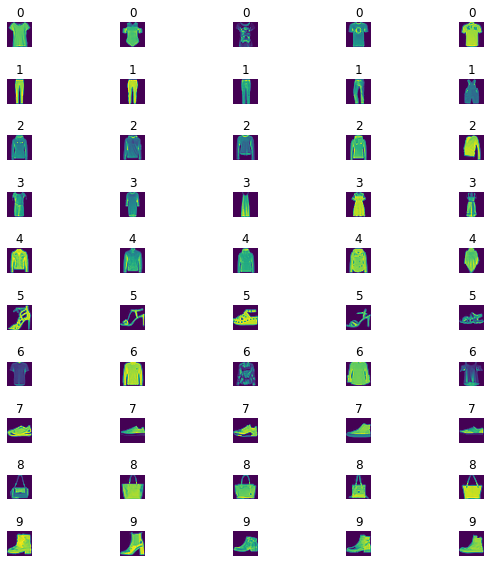

In [24]:
n_cols = 5
n_classes = 10  # no of categories present in y_train

fig, ax = plt.subplots(n_classes, n_cols, figsize=(8,8))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
    selected_images = x_train[y_train == j] 
    img = selected_images[np.random.randint(0, len(selected_images))]
    ax[j][i].imshow(img)
    ax[j][i].set_title(str(j))
    ax[j][i].axis('off')
plt.show()

In [27]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [28]:
from keras.utils.np_utils import to_categorical
y_trian = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [42]:
# convolutional neural network
model = Sequential()
model.add(Conv2D(32,(5,5), input_shape=(28,28,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu')) 
model.add(Dense(10, activation='sigmoid'))

model.compile(RMSprop(lr=0.001), 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

In [43]:
h = model.fit(x_train, y_trian, epochs=10, verbose=1,
              validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3355 - accuracy: 0.6481 - val_loss: 0.5284 - val_accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3996 - accuracy: 0.8579 - val_loss: 0.3814 - val_accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3603 - accuracy: 0.8698 - val_loss: 0.4049 - val_accuracy: 0.8646
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3534 - accuracy: 0.8754 - val_loss: 0.3948 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3458 - accuracy: 0.8828 - val_loss: 0.4372 - val_accuracy: 0.8586
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3452 - accuracy: 0.8822 - val_loss: 0.4661 - val_accuracy: 0.8691
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3606 - accuracy: 0.8794 - val_loss: 0.8498 - val_ac

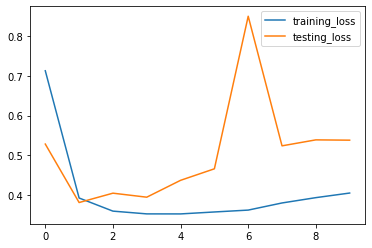

In [44]:
plt.plot(h.history['loss'], label= 'training_loss')
plt.plot(h.history['val_loss'], label='testing_loss')
plt.legend()
plt.show()

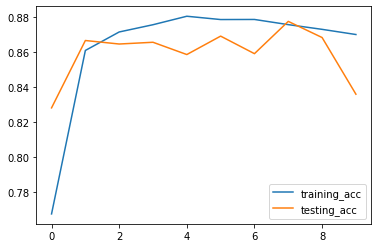

In [45]:
plt.plot(h.history['accuracy'], label='training_acc')
plt.plot(h.history['val_accuracy'], label='testing_acc')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


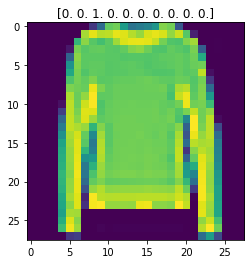

In [49]:
img = x_test[99]
img = img.reshape(28,28)
plt.imshow(img)
plt.title(y_test[99])
plt.show()

In [55]:
from keras.models import Model
layer0 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)
visual_layer = layer0.predict(x_test[99].reshape(1,28,28,1))
visual_layer2 = layer2.predict(x_test[99].reshape(1, 28, 28, 1))

In [56]:
print(visual_layer2.shape) 
visual_layer.shape 

(1, 10, 10, 16)


(1, 24, 24, 32)

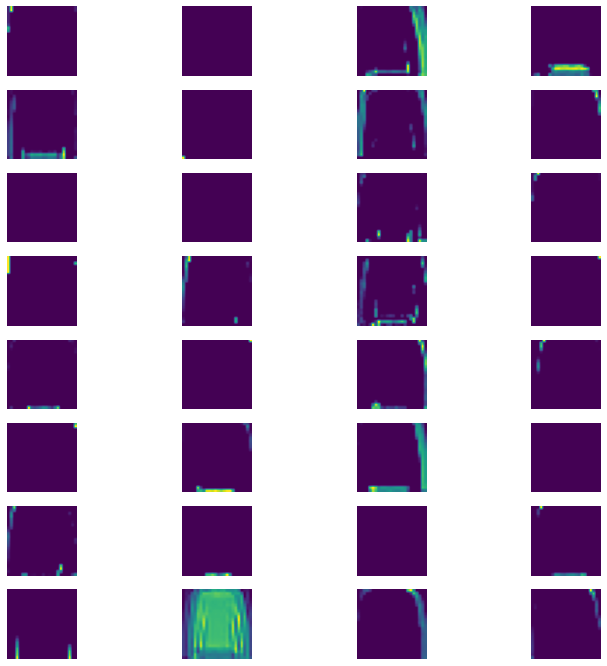

In [53]:
plt.figure(figsize=(12,12))
for i in range(32):
  plt.subplot(8,4, i+1)
  plt.imshow(visual_layer[0, :,:,i])
  plt.axis('off')
  

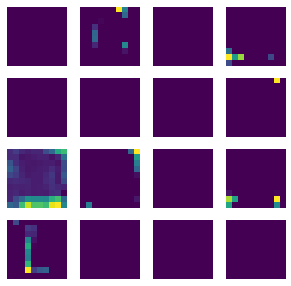

In [59]:
plt.figure(figsize=(5,5))
for i in range(16):
  plt.subplot(4,4, i+1)
  plt.imshow(visual_layer2[0, :,:,i])
  plt.axis('off')